In [525]:
import numpy as np #NUMERICAL COMPUTING TOOLS
import pandas as pd #data analysis
import seaborn as sns # data visualization
#import chardet
import matplotlib.pyplot as plt
%matplotlib inline

In [526]:
#load data frame
df = pd.read_csv('C:/Users/DELL/Desktop/New folder (3)/New folder/StudentsPerformance.csv')

In [527]:
#show data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [528]:
df.shape

(1000, 8)

In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [530]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [531]:
#delete featuers not need
df = df.drop(['gender','race/ethnicity','parental level of education','lunch'],axis=1)

In [532]:
df.head()

,test preparation course,math score,reading score,writing score
0,none,72,72,74
1,completed,69,90,88
2,none,90,95,93
3,none,47,57,44
4,none,76,78,75


In [533]:
#for data manipulation
dummy = pd.get_dummies(df['test preparation course'])

In [534]:
dummy.head()

,completed,none
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [535]:
df = pd.concat((df,dummy),axis=1)

In [536]:
df.head()

,test preparation course,math score,reading score,writing score,completed,none
0,none,72,72,74,0,1
1,completed,69,90,88,1,0
2,none,90,95,93,0,1
3,none,47,57,44,0,1
4,none,76,78,75,0,1


In [537]:
df = df.drop(['test preparation course','none'],axis=1)

In [538]:
df.head()

,math score,reading score,writing score,completed
0,72,72,74,0
1,69,90,88,1
2,90,95,93,0
3,47,57,44,0
4,76,78,75,0


In [539]:
#change name complet featuers to test preparation
df = df.rename(columns={'completed':'test Preparation'})

In [540]:
df.head()

,math score,reading score,writing score,test Preparation
0,72,72,74,0
1,69,90,88,1
2,90,95,93,0
3,47,57,44,0
4,76,78,75,0


In [541]:
#create corr object
corr = df.corr()

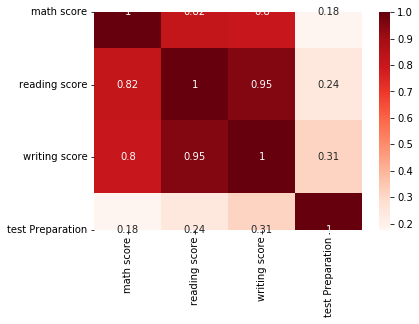

In [542]:
#show relation between featuers
sns.heatmap(corr,annot=True, cmap=plt.cm.Reds)
plt.show()

In [543]:
#delet test preparation
df = df.drop(['test Preparation'],axis=1)

In [544]:
df.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [545]:
#find mean for (math , reading and writing) create new featuer name result for target featuer
df['result']=df[['math score','reading score','writing score']].mean(axis=1)

In [546]:
df.head()

,math score,reading score,writing score,result
0,72,72,74,72.666667
1,69,90,88,82.333333
2,90,95,93,92.666667
3,47,57,44,49.333333
4,76,78,75,76.333333


In [550]:
#show statics propertis featuers
df.describe()

,math score,reading score,writing score,result
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


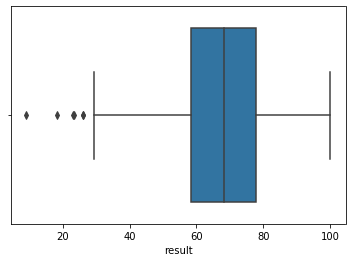

In [551]:
#find outlier by boxplot
sns.boxplot(x=df['result'])

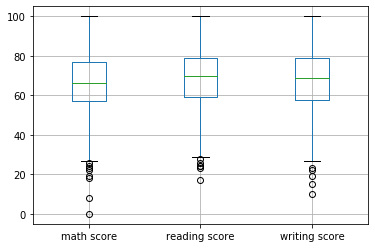

In [552]:
#show outlier for math scor ,reading score and writing score for find outlier 
df.boxplot(['math score','reading score','writing score'])

In [553]:
#find null value for three feuters
df.isnull().sum()

math score       0
reading score    0
writing score    0
result           0
dtype: int64

In [554]:
#find outlier
for x in ['math score','reading score','writing score']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    inter_qr = q75 -q25
    
    max = q75+(1.5 * inter_qr)
    min = q25-(1.5 * inter_qr)
    
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

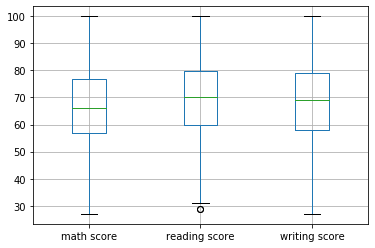

In [555]:
#show all featuers without outlier
df.boxplot(['math score','reading score','writing score'])

In [556]:
df.isnull().sum()

math score       8
reading score    6
writing score    5
result           0
dtype: int64

In [557]:
#drop null value
df= df.dropna(axis=0)

In [558]:
df.isnull().sum()

math score       0
reading score    0
writing score    0
result           0
dtype: int64

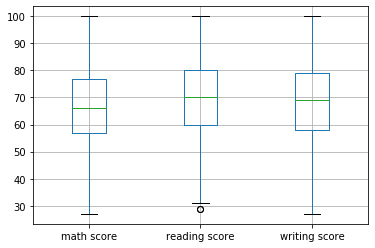

In [559]:
df.boxplot(['math score','reading score','writing score'])

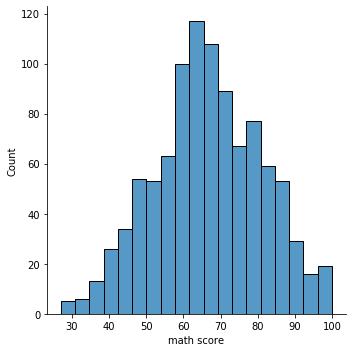

In [560]:
#plot probablity destrbution  all math score
sns.displot(df['math score'])

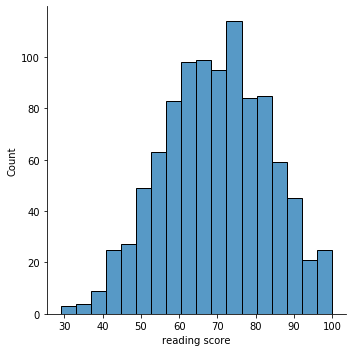

In [561]:
#show perobablity destrbution for reading score 
sns.displot(df['reading score'])

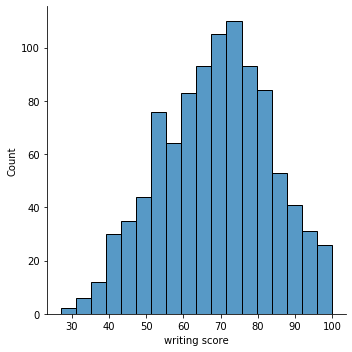

In [562]:
#show probablity distrbution for writing score
sns.displot(df['writing score'])

In [563]:
df2.sample(10)

,math score,reading score,writing score,result
202,69,77,69,71.666667
548,62,67,64,64.333333
797,70,84,81,78.333333
705,62,72,65,66.333333
432,61,56,55,57.333333
282,73,79,84,78.666667
433,47,59,50,52.000000
598,69,77,73,73.000000
515,76,87,85,82.666667
67,60,72,74,68.666667


In [564]:
#import linear regresion algorithem
from sklearn import linear_model

In [565]:
#create linear regresion object
reg = linear_model.LinearRegression()
reg.fit(df[['math score','reading score','writing score']],df.result)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [566]:
#It is used to estimate the coefficients for the linear regression problem
reg.coef_

array([0.33333333, 0.33333333, 0.33333333])

In [567]:
#Intercepts allows you to intercept any function call in Python
reg.intercept_

-1.4210854715202004e-14

In [568]:
#predict data 
reg.predict([[50,80,76]])

array([68.66666667])